In [7]:
import pandas as pd
import numpy as np
import random

# Lists for data888
names = ["Arjun Sharma", "Ananya Iyer", "Rahul Verma", "Sana Khan", "Vikram Singh", 
         "Priya Das", "Amit Patel", "Sneha Reddy", "Ishaan Malhotra", "Meera Joshi",
         "Karan Gill", "Aditi Rao", "Rohan Gupta", "Zoya Sheikh", "Varun Nair",
         "Deepika Pal", "Siddharth Bose", "Kriti Jain", "Yash Kapoor", "Tanvi Shah",
         "Akash Mishra", "Riya Sen", "Manish Pandey", "Nisha Choudhury", "Sahil Tyagi"]
cities = ["Mumbai", "Delhi", "Bangalore", "Hyderabad", "Jodhpur", "Pune", "Chennai"]

df_messy = pd.DataFrame({
    'Customer_ID': range(1001, 1026),
    'Name': names,
    'City': [random.choice(cities) for _ in range(25)],
    'Purchase_Amount': [round(random.uniform(500, 5000), 2) for _ in range(25)],
    'DOB': [f"{random.randint(1,28)}-{random.randint(1,12)}-{random.randint(1990, 2005)}" for _ in range(25)]
})


df_messy.loc[2, 'Purchase_Amount'] = np.nan
df_messy.loc[7, 'City'] = np.nan
df_messy.loc[12, 'Name'] = np.nan
df_messy.loc[15, 'DOB'] = np.nan
df_messy.loc[20, 'Purchase_Amount'] = np.nan
df_messy.loc[24, 'City'] = np.nan
df_messy.to_csv('internship_data_extra_messy.csv', index=False)

df_messy.isnull().sum()

print("--- FULL DATASET (25 ROWS) ---")
display(df_messy) 

print("\n--- DATA QUALITY ASSESSMENT: MISSING VALUES REPORT ---")
missing_counts = df_messy.isnull().sum()

missing_only = missing_counts[missing_counts > 0]

if not missing_only.empty:
    print("The following columns contain critical missing data:")
    print(missing_only)
else:
    print("No missing values found!")

--- FULL DATASET (25 ROWS) ---


,Customer_ID,Name,City,Purchase_Amount,DOB
0,1001,Arjun Sharma,Pune,560.41,2-3-1999
1,1002,Ananya Iyer,Chennai,1589.58,23-4-1990
2,1003,Rahul Verma,Delhi,NaN,3-7-1995
3,1004,Sana Khan,Hyderabad,1284.46,24-3-2002
4,1005,Vikram Singh,Mumbai,960.84,12-2-2005
5,1006,Priya Das,Delhi,2033.93,2-6-2002
6,1007,Amit Patel,Jodhpur,2444.31,10-2-2003
7,1008,Sneha Reddy,NaN,3523.70,24-10-1993
8,1009,Ishaan Malhotra,Jodhpur,4616.93,10-3-1991
9,1010,Meera Joshi,Pune,2155.65,3-11-2003



--- DATA QUALITY ASSESSMENT: MISSING VALUES REPORT ---
The following columns contain critical missing data:
Name               1
City               2
Purchase_Amount    2
DOB                1
dtype: int64


In [4]:
import pandas as pd  
import numpy as np

df = pd.read_csv('internship_data_extra_messy.csv')

df['Name'] = df['Name'].fillna('Guest Customer')

df['City'] = df['City'].fillna(df['City'].mode()[0]).str.title()

df['Purchase_Amount'] = df['Purchase_Amount'].fillna(df['Purchase_Amount'].mean())

df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce',dayfirst=True)
df.loc[15, 'DOB'] = pd.to_datetime('20-10-1995', dayfirst=True)
df['Customer_Age'] = 2026 - df['DOB'].dt.year
df['Customer_Age'] = df['Customer_Age'].fillna(df['Customer_Age'].median()).astype(int)
df.to_csv('cleaned_extra_messy.csv', index=False)

print("--- DATA CLEANING SUCCESSFUL ---")
print(f"Missing values remaining: {df.isnull().sum().sum()}") 
display(df)

--- DATA CLEANING SUCCESSFUL ---
Missing values remaining: 0


,Customer_ID,Name,City,Purchase_Amount,DOB,Customer_Age
0,1001,Arjun Sharma,Delhi,2200.280000,2005-06-04,21
1,1002,Ananya Iyer,Mumbai,1859.030000,1994-02-18,32
2,1003,Rahul Verma,Pune,2637.637826,2001-01-19,25
3,1004,Sana Khan,Hyderabad,2402.030000,2000-02-04,26
4,1005,Vikram Singh,Pune,2874.470000,2004-12-25,22
5,1006,Priya Das,Chennai,2297.480000,1993-07-08,33
6,1007,Amit Patel,Mumbai,3466.420000,1999-06-01,27
7,1008,Sneha Reddy,Chennai,1025.270000,1990-09-26,36
8,1009,Ishaan Malhotra,Chennai,1992.450000,1990-11-06,36
9,1010,Meera Joshi,Delhi,4762.300000,1996-12-08,30


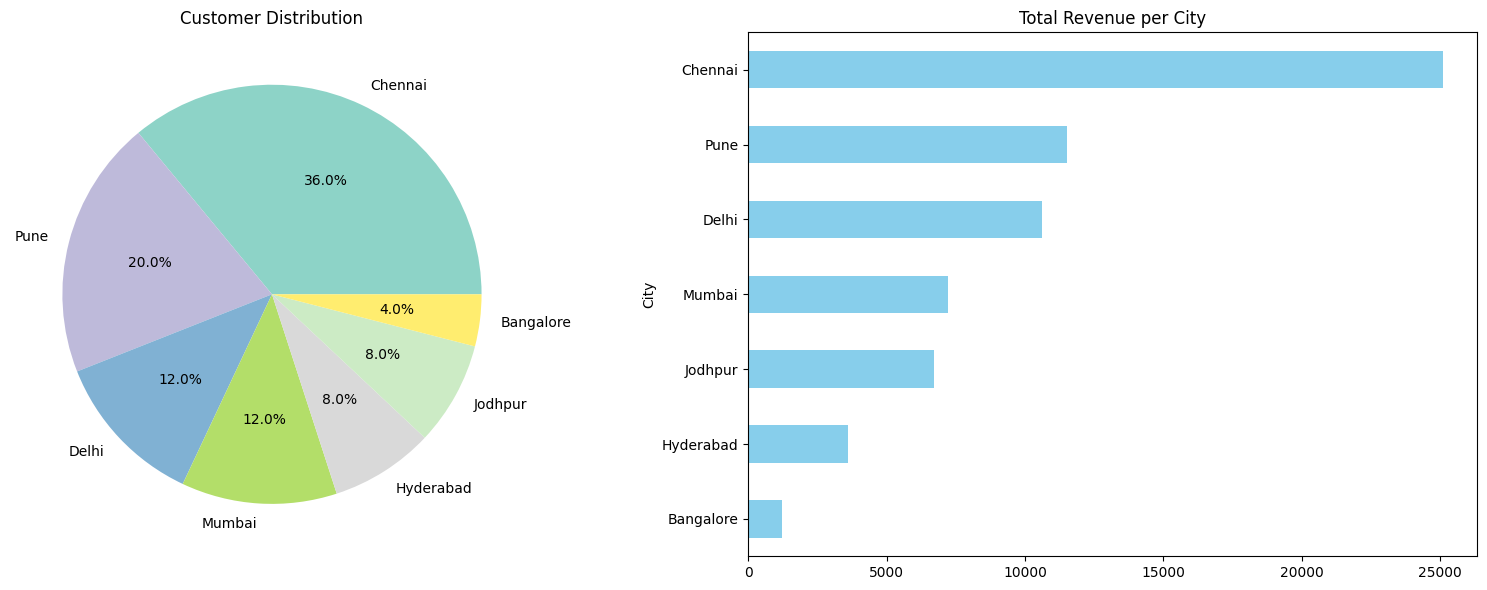

In [5]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

df['City'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax1, 
                               title='Customer Distribution', cmap='Set3')

df.groupby('City')['Purchase_Amount'].sum().sort_values().plot(kind='barh', 
                                                              color='skyblue', ax=ax2, 
                                                              title='Total Revenue per City')

plt.tight_layout()
plt.show()